In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from copy import deepcopy
%matplotlib inline

C:\Users\Ryan\Anaconda2\envs\py3k\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')

In [3]:
print (df.head(10))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


In [4]:
features = ['Age','EstimatedSalary']
X = df[features]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
# standardization
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

In [5]:
classifier = LogisticRegression()
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)

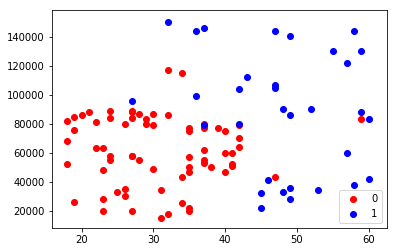

In [6]:
fig, ax = plt.subplots()
colors = ['r','b']
for l, c in zip(np.unique(y_pred),colors):
    ax.scatter(x=X_test[y_test==l].Age,y=X_test[y_test==l].EstimatedSalary,c=c,label=l)

ax.legend(loc=4)



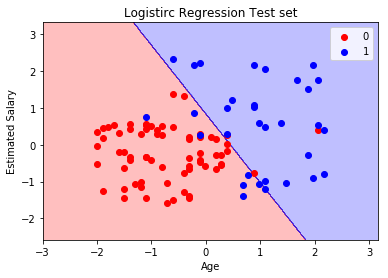

In [7]:
# nicer visual
X_set, y_set = X_test_std, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

fig, ax = plt.subplots()
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue')))

colors = ['r','b']
for l, c in zip(np.unique(y_pred),colors):
    plt.scatter(x=X_set[y_test==l,0],y=X_set[y_test==l,1],c=c,label=l)
    
plt.title('Logistirc Regression Test set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()